In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
%matplotlib inline

C:\Users\prapa\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Global = pd.read_csv("./datasets/GlobalDataset2017.csv")

In [3]:
Global.shape

(47102, 58)

In [4]:
Global.dtypes

yearOfRegistration                         int64
Datasource                                object
gender                                    object
ageBroad                                  object
majorityStatus                            object
majorityStatusAtExploit                   object
majorityEntry                             object
citizenship                               object
meansOfControlDebtBondage                  int64
meansOfControlTakesEarnings                int64
meansOfControlRestrictsFinancialAccess     int64
meansOfControlThreats                      int64
meansOfControlPsychologicalAbuse           int64
meansOfControlPhysicalAbuse                int64
meansOfControlSexualAbuse                  int64
meansOfControlFalsePromises                int64
meansOfControlPsychoactiveSubstances       int64
meansOfControlRestrictsMovement            int64
meansOfControlRestrictsMedicalCare         int64
meansOfControlExcessiveWorkingHours        int64
meansOfControlUsesCh

In [5]:
(Global == -99).sum()

yearOfRegistration                            0
Datasource                                    0
gender                                        0
ageBroad                                      0
majorityStatus                                0
majorityStatusAtExploit                       0
majorityEntry                                 0
citizenship                                   0
meansOfControlDebtBondage                 46096
meansOfControlTakesEarnings               44853
meansOfControlRestrictsFinancialAccess    46982
meansOfControlThreats                     44376
meansOfControlPsychologicalAbuse          43740
meansOfControlPhysicalAbuse               44522
meansOfControlSexualAbuse                 46150
meansOfControlFalsePromises               44510
meansOfControlPsychoactiveSubstances      45748
meansOfControlRestrictsMovement           44099
meansOfControlRestrictsMedicalCare        46169
meansOfControlExcessiveWorkingHours       45539
meansOfControlUsesChildren              

In [ ]:
feature_cols = [h for h in Global.columns if h != 'isSexualExploit' and h!= 'RecruiterRelationship' 
               and h!='CountryOfExploitation' and h!='citizenship']
feature_cols

In [35]:
feature_mean = [h for h in Global.columns if h.startswith("meansOfControl") and h !='meansOfControlNotSpecified']
feature_mean

['meansOfControlDebtBondage',
 'meansOfControlTakesEarnings',
 'meansOfControlRestrictsFinancialAccess',
 'meansOfControlThreats',
 'meansOfControlPsychologicalAbuse',
 'meansOfControlPhysicalAbuse',
 'meansOfControlSexualAbuse',
 'meansOfControlFalsePromises',
 'meansOfControlPsychoactiveSubstances',
 'meansOfControlRestrictsMovement',
 'meansOfControlRestrictsMedicalCare',
 'meansOfControlExcessiveWorkingHours',
 'meansOfControlUsesChildren',
 'meansOfControlThreatOfLawEnforcement',
 'meansOfControlWithholdsNecessities',
 'meansOfControlWithholdsDocuments',
 'meansOfControlOther']

In [36]:
X = Global[feature_mean]
y = Global.isSexualExploit

In [37]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 5-fold cross-validation with each value of max_depth

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

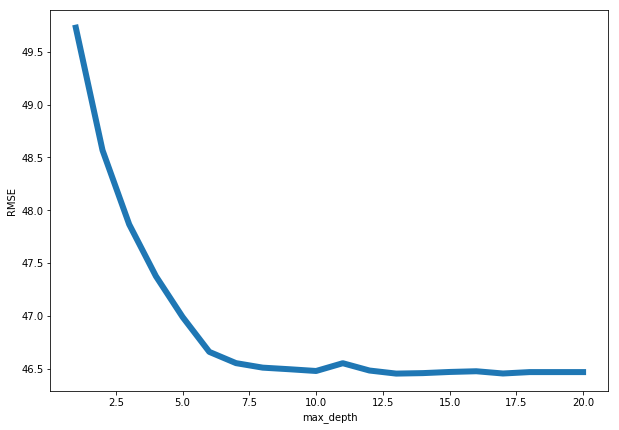

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(max_depth_range, RMSE_scores, linewidth = 6)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [39]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(46.454181328639777, 13)

In [41]:
treereg = DecisionTreeRegressor(max_depth=13, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [42]:
pd.DataFrame({'feature':feature_mean, 
              'importance':treereg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
4,meansOfControlPsychologicalAbuse,0.431327
9,meansOfControlRestrictsMovement,0.183486
5,meansOfControlPhysicalAbuse,0.119236
8,meansOfControlPsychoactiveSubstances,0.081053
3,meansOfControlThreats,0.064919
1,meansOfControlTakesEarnings,0.041274
16,meansOfControlOther,0.024411
7,meansOfControlFalsePromises,0.016863
6,meansOfControlSexualAbuse,0.012653
14,meansOfControlWithholdsNecessities,0.007618


In [43]:
#Intialize
rfreg = RandomForestRegressor()
#Show model details
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

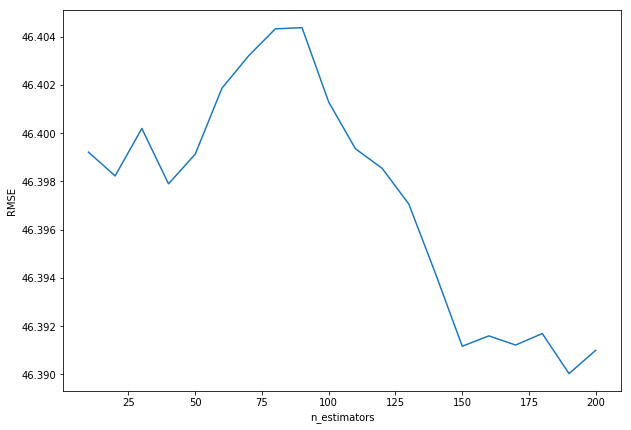

In [45]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [46]:
#Best estimator
sorted(zip(RMSE_scores, estimator_range))[0]

(46.39003673621967, 190)

In [47]:
# list of values to try for max_features
feature_range = range(1, len(feature_mean)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=190, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

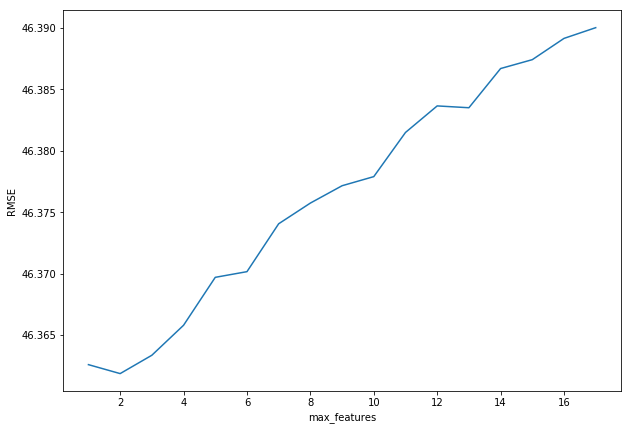

In [48]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [49]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(46.361851143016303, 2)

In [51]:
# max_features=6 is best and n_estimators=190 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=190, 
                              max_features=2,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=190, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [53]:
# compute feature importances
pd.DataFrame({'feature':feature_mean,
              'importance':rfreg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
4,meansOfControlPsychologicalAbuse,0.203210
5,meansOfControlPhysicalAbuse,0.134720
9,meansOfControlRestrictsMovement,0.133214
3,meansOfControlThreats,0.119180
1,meansOfControlTakesEarnings,0.097864
8,meansOfControlPsychoactiveSubstances,0.090729
16,meansOfControlOther,0.057538
11,meansOfControlExcessiveWorkingHours,0.034077
6,meansOfControlSexualAbuse,0.033726
7,meansOfControlFalsePromises,0.025237
